## PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(10,5)

In [3]:
df=pd.read_csv(r"C:\Users\vmagomere\Downloads\SPATIAL_DATA_SCIENCE\iris.data",header=None)
df.columns=["sepal_length","sepal_width","petal_length","petal_width","species"]
df.dropna(how="all",inplace=True)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

### Visualize data
1. hue - color
2. style - legend

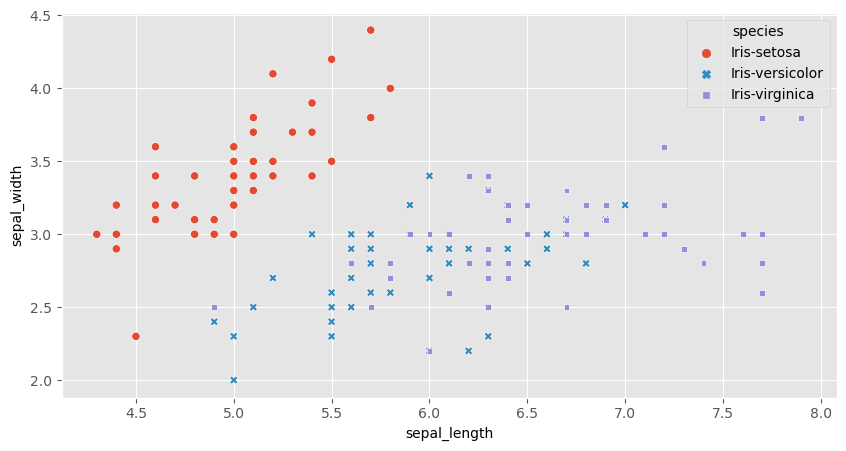

In [5]:
sns.scatterplot(x=df.sepal_length, y=df.sepal_width,hue=df.species,style=df.species);

### standardize the data
With great power to reduce dimensionality comes great responsibility<br>
Take care to preprocess data appropriately

In [6]:
# subtract the mean of each feature from the training set

In [7]:
X= df.iloc[:,0:4].values
y=df.species.values

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X=StandardScaler().fit_transform(X)

### Compute the eigenvector and eigenvalues

In [10]:
### Compute the eigenvector and eigenvalues
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

1. eigen decomposition

In [11]:
# eigen decomposition
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen vectors \n",eigen_vectors ,"\n")
print("Eigen values \n",eigen_values)

Eigen vectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen values 
 [2.93035378 0.92740362 0.14834223 0.02074601]


2. Singular value decomposition

In [12]:
eigen_vec_svd,s,v=np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [13]:
s

array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839])

In [14]:
v

array([[ 1.08374515e-01,  9.98503796e-02,  1.13323362e-01, ...,
        -7.27833114e-02, -6.58701606e-02, -4.59092965e-02],
       [-4.30198387e-02,  5.57547718e-02,  2.70926177e-02, ...,
        -2.26960075e-02, -8.64611208e-02,  1.89567788e-03],
       [ 2.59377669e-02,  4.83370288e-02, -1.09498919e-02, ...,
        -3.81328738e-02, -1.98113038e-01, -1.12476331e-01],
       ...,
       [ 5.42576376e-02,  5.32189412e-03,  2.76010922e-02, ...,
         9.89545817e-01, -1.40226565e-02, -7.86338250e-04],
       [ 1.60581494e-03,  8.56651825e-02,  1.78415121e-01, ...,
        -1.24233079e-02,  9.52228601e-01, -2.19591161e-02],
       [ 2.27770498e-03,  6.44405862e-03,  1.49430370e-01, ...,
        -6.58105858e-04, -2.32385318e-02,  9.77215825e-01]])

In [15]:
#print eigen values
for val in eigen_values:
    print(val)

2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


In [16]:
# calculate variance explained by eigen values
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]

from the results, the first eigen value explains more than the rest

In [17]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

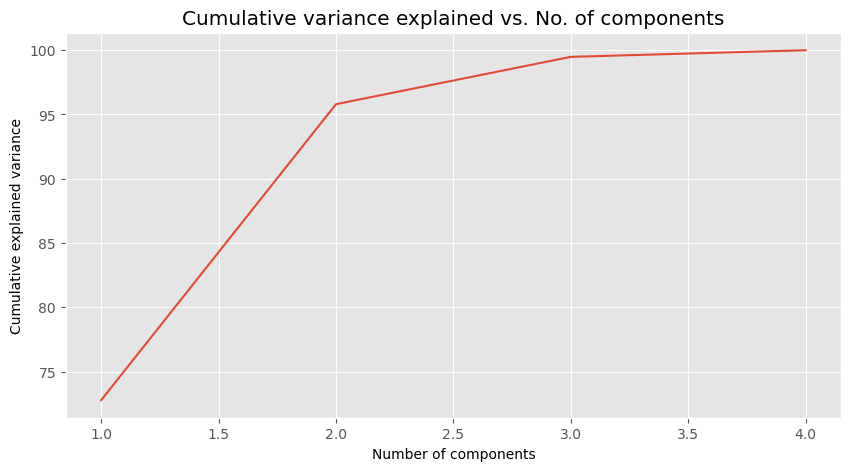

In [18]:
sns.lineplot(x=[1,2,3,4], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative variance explained vs. No. of components")
plt.show()

In [19]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [20]:
projection_matrix=(eigen_vectors.T[:][:])[:2].T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

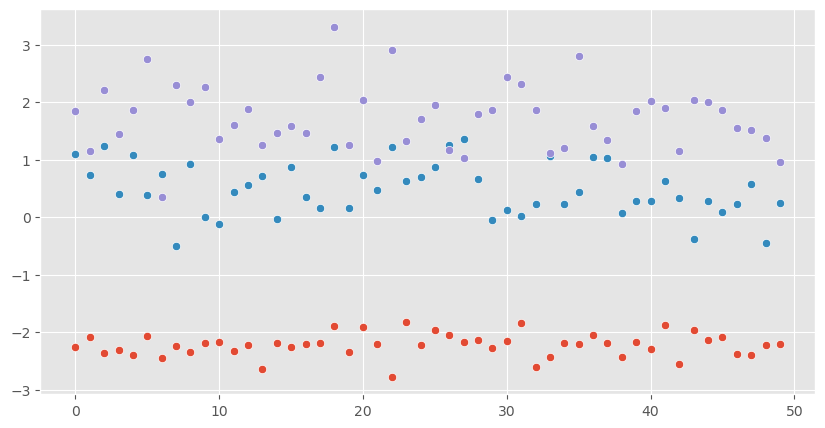

In [21]:
X_pca = X.dot(projection_matrix)
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y==species,0])